<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/EDA_Churn_Modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [11]:
new_df = pd.DataFrame(df,columns = ['Age','Tenure'])

In [12]:
new_df.head()

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2


In [13]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


In [14]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(new_df)
print(standardized_df)

[[ 0.29351742 -1.04175968]
 [ 0.19816383 -1.38753759]
 [ 0.29351742  1.03290776]
 ...
 [-0.27860412  0.68712986]
 [ 0.29351742 -0.69598177]
 [-1.04143285 -0.35020386]]


In [15]:
import statistics

Function to detect outlier on one dimensional data

In [16]:
def find_anomalies(new_df):
#define a list to ccumalate anomalies
  anomalies = []


#set upper and lower limit to 3 standard deviation
  random_data_std = statistics.stdev(new_df)
  random_data_mean = statistics.mean(new_df)

# 3 standard deviation
  anomaly_cut_off =  random_data_std * 3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off
#Generate outlier
  for outlier in new_df:
    if outlier>upper_limit or outlier<lower_limit:

      anomalies.append(outlier)
  return anomalies

In [17]:
list1= find_anomalies(new_df['Age'])

In [18]:
len(list1)

133

In [19]:
len(new_df)

10000

In [20]:
new_df.Age.skew()

1.0113202630234552

<Axes: xlabel='Age', ylabel='Density'>

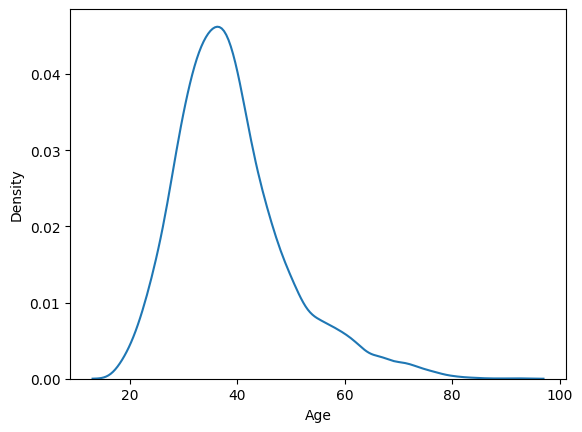

In [21]:
sns.kdeplot(new_df.Age)

In [22]:
new_df['Age_transformed'] = np.log(new_df.Age)

<Axes: xlabel='Age_transformed', ylabel='Density'>

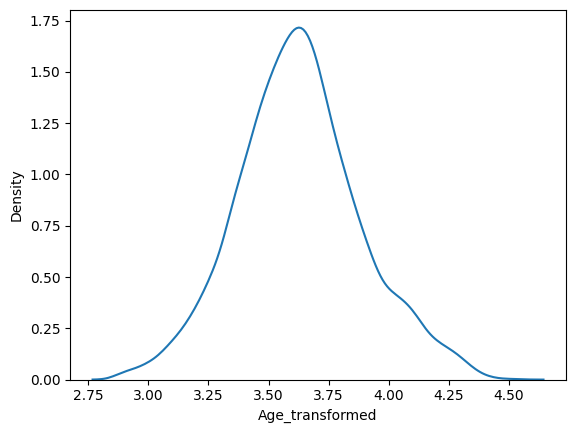

In [23]:
sns.kdeplot(new_df.Age_transformed)

In [24]:
new_df.Age_transformed.skew()

0.182020112559587

In [25]:
list_2 = find_anomalies(new_df.Age_transformed)

In [26]:
len(list_2)

8

In [27]:
len(new_df)

10000

In [28]:
new_df['Age_transformed_double'] = np.log(new_df.Age_transformed)

In [29]:
new_df.Age_transformed_double.skew()

-0.046405871674037896

<Axes: xlabel='Age_transformed_double', ylabel='Density'>

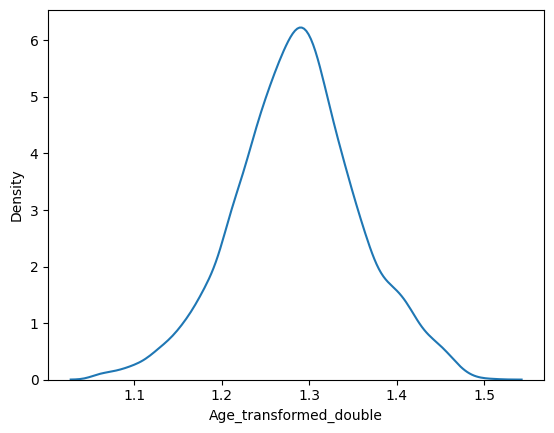

In [30]:
sns.kdeplot(new_df.Age_transformed_double)

Box PLot

<Axes: >

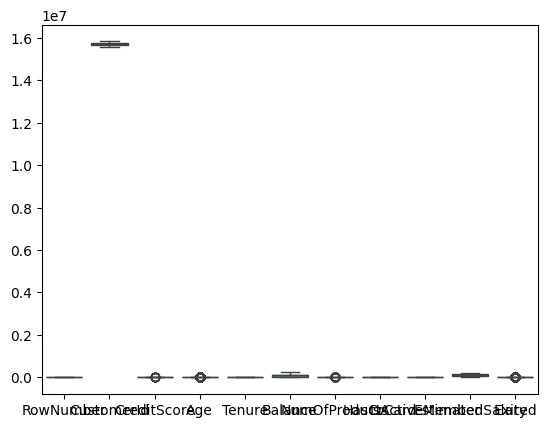

In [31]:
sns.boxplot(df)

Analysis

In [32]:
new_df.head()

,Age,Tenure,Age_transformed,Age_transformed_double
0,42,2,3.737670,1.318462
1,41,1,3.713572,1.311994
2,42,8,3.737670,1.318462
3,39,1,3.663562,1.298436
4,43,2,3.761200,1.324738


In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
